<a href="https://colab.research.google.com/github/polinakochneva1/me_labs_house/blob/main/laba_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

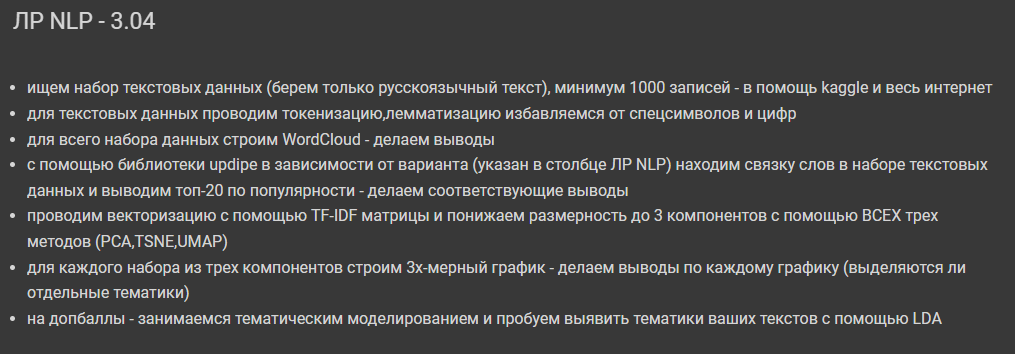